In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cardata = pd.read_csv('cardata.csv')
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(cardata.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
sellingprice = pd.DataFrame(cardata['Selling_Price'])
sellingprice.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [7]:
brand = pd.DataFrame(cardata['Car_Name'])
brand.head()

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


In [8]:
brand

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift
...,...
296,city
297,brio
298,city
299,city


In [16]:
cardata.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## We see the number of cars with different amounts of owners it had


In [18]:
print(cardata["Owner"].value_counts())

0    290
1     10
3      1
Name: Owner, dtype: int64


## We see which index is the car with 3 owners

In [37]:
cardata.index[cardata['Owner']==3].tolist()

[85]

 ## We remove the car with 3 owners from the data set as we decided it is irrelevant to our problem as we will not consider cars with more than 1 owner

In [25]:
print(cardata["Owner"].drop(85).value_counts())

0    290
1     10
Name: Owner, dtype: int64


In [34]:
cleancar = cardata.drop(85)
cleancar.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.653333,4.668500,7.574800,36597.030000,0.033333
std,2.862482,5.089765,8.608174,38473.551916,0.179805
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.875000,1.200000,15000.000000,0.000000
50%,2014.000000,3.625000,6.250000,32000.000000,0.000000
75%,2016.000000,6.000000,9.862500,48191.750000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000


In [39]:
print("Number of different transmissions: ", len(cardata["Transmission"].unique()))

print(cardata["Transmission"].value_counts())

Number of different transmissions:  2
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [41]:
print("Number of different seller types: ", len(cardata["Seller_Type"].unique()))

print(cardata["Seller_Type"].value_counts())

Number of different seller types:  2
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [42]:
print("Number of different fuel types: ", len(cardata["Fuel_Type"].unique()))

print(cardata["Fuel_Type"].value_counts())

Number of different fuel types:  3
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [44]:
cardata.index[cardata['Fuel_Type']== 'CNG'].tolist()

[18, 35]

## We drop the rows with CNG as fuel type as there are very little cars with it

In [46]:
cleancar = cardata.drop([18,35,85])
cleancar.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,2013.657718,4.679027,7.582584,36555.741611,0.033557
std,2.866906,5.105225,8.635896,38594.967809,0.180389
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.825000,1.200000,15000.000000,0.000000
50%,2014.000000,3.700000,6.250000,31802.000000,0.000000
75%,2016.000000,6.000000,9.887500,47750.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000


## We drop the seller type because we assume that they sell it the same way

In [50]:
cleancar.drop(["Seller_Type"], axis = 1, inplace = True)
cleancar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       298 non-null    object 
 1   Year           298 non-null    int64  
 2   Selling_Price  298 non-null    float64
 3   Present_Price  298 non-null    float64
 4   Kms_Driven     298 non-null    int64  
 5   Fuel_Type      298 non-null    object 
 6   Transmission   298 non-null    object 
 7   Owner          298 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 29.1+ KB


## We drop the car name because we are just looking at what kind of functions affect the pricing of the car


In [51]:
cleancar.drop(["Car_Name"], axis = 1, inplace = True)
cleancar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           298 non-null    int64  
 1   Selling_Price  298 non-null    float64
 2   Present_Price  298 non-null    float64
 3   Kms_Driven     298 non-null    int64  
 4   Fuel_Type      298 non-null    object 
 5   Transmission   298 non-null    object 
 6   Owner          298 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 26.7+ KB


## We change the variable type of fuel type and transmission to 1 and 0 to fit into the regression model

In [61]:
cleancar['Fuel_Type'] = cleancar['Fuel_Type'].replace(['Petrol', 'Diesel'], [0, 1])

In [69]:
cleancar['Transmission'] = cleancar['Transmission'].replace(['Manual', 'Automatic'], [0, 1])

In [70]:
cleancar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           298 non-null    int64  
 1   Selling_Price  298 non-null    float64
 2   Present_Price  298 non-null    float64
 3   Kms_Driven     298 non-null    int64  
 4   Fuel_Type      298 non-null    int64  
 5   Transmission   298 non-null    int64  
 6   Owner          298 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.7 KB


In [83]:
y = pd.DataFrame(cleancar["Selling_Price"])
x = pd.DataFrame(cleancar[["Year", "Present_Price", "Kms_Driven", "Fuel_Type", "Transmission"]])

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (223, 1) (223, 5)
Test Set  : (75, 1) (75, 5)


In [85]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

<AxesSubplot:>

In [86]:
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<AxesSubplot:>

In [87]:
sb.pairplot(data = trainDF)

In [88]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()         
linreg.fit(x_train, y_train)        

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-612.77470178]
Coefficients of Regression 	: a =  [[ 3.04954234e-01  4.63450453e-01 -2.45970928e-05  2.43088164e+00
   2.03672449e+00]]



,Predictors,Coefficients
0,Year,0.304954
1,Present_Price,0.463450
2,Kms_Driven,-0.000025
3,Fuel_Type,2.430882
4,Transmission,2.036724


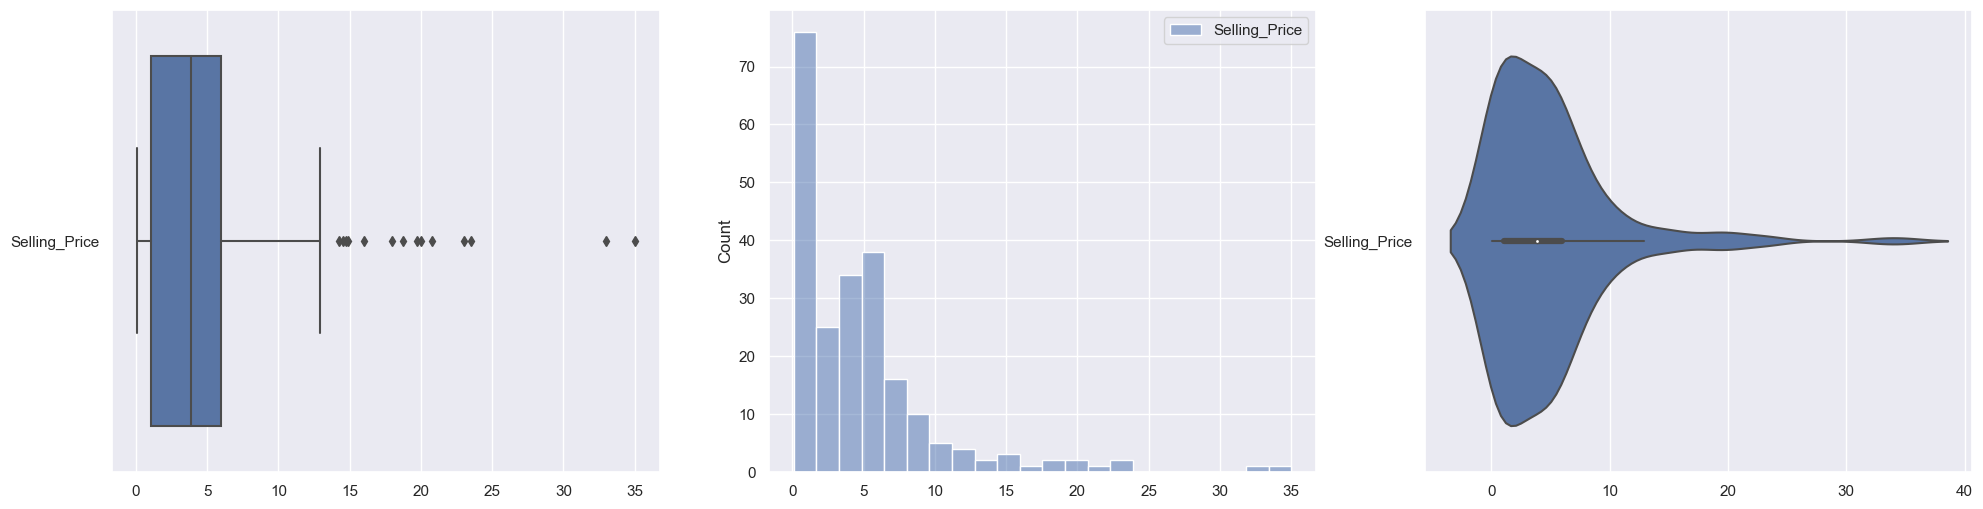

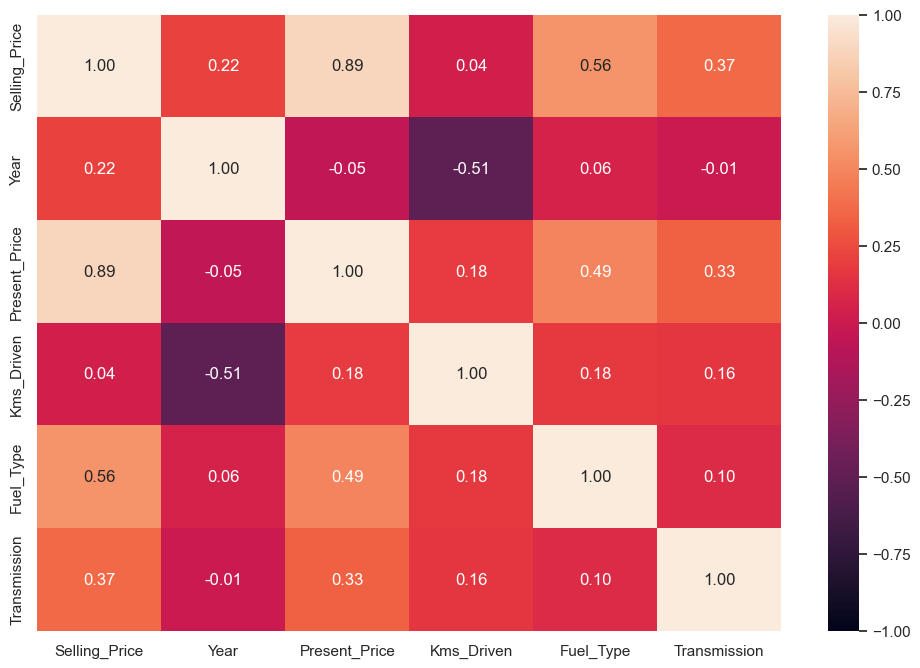

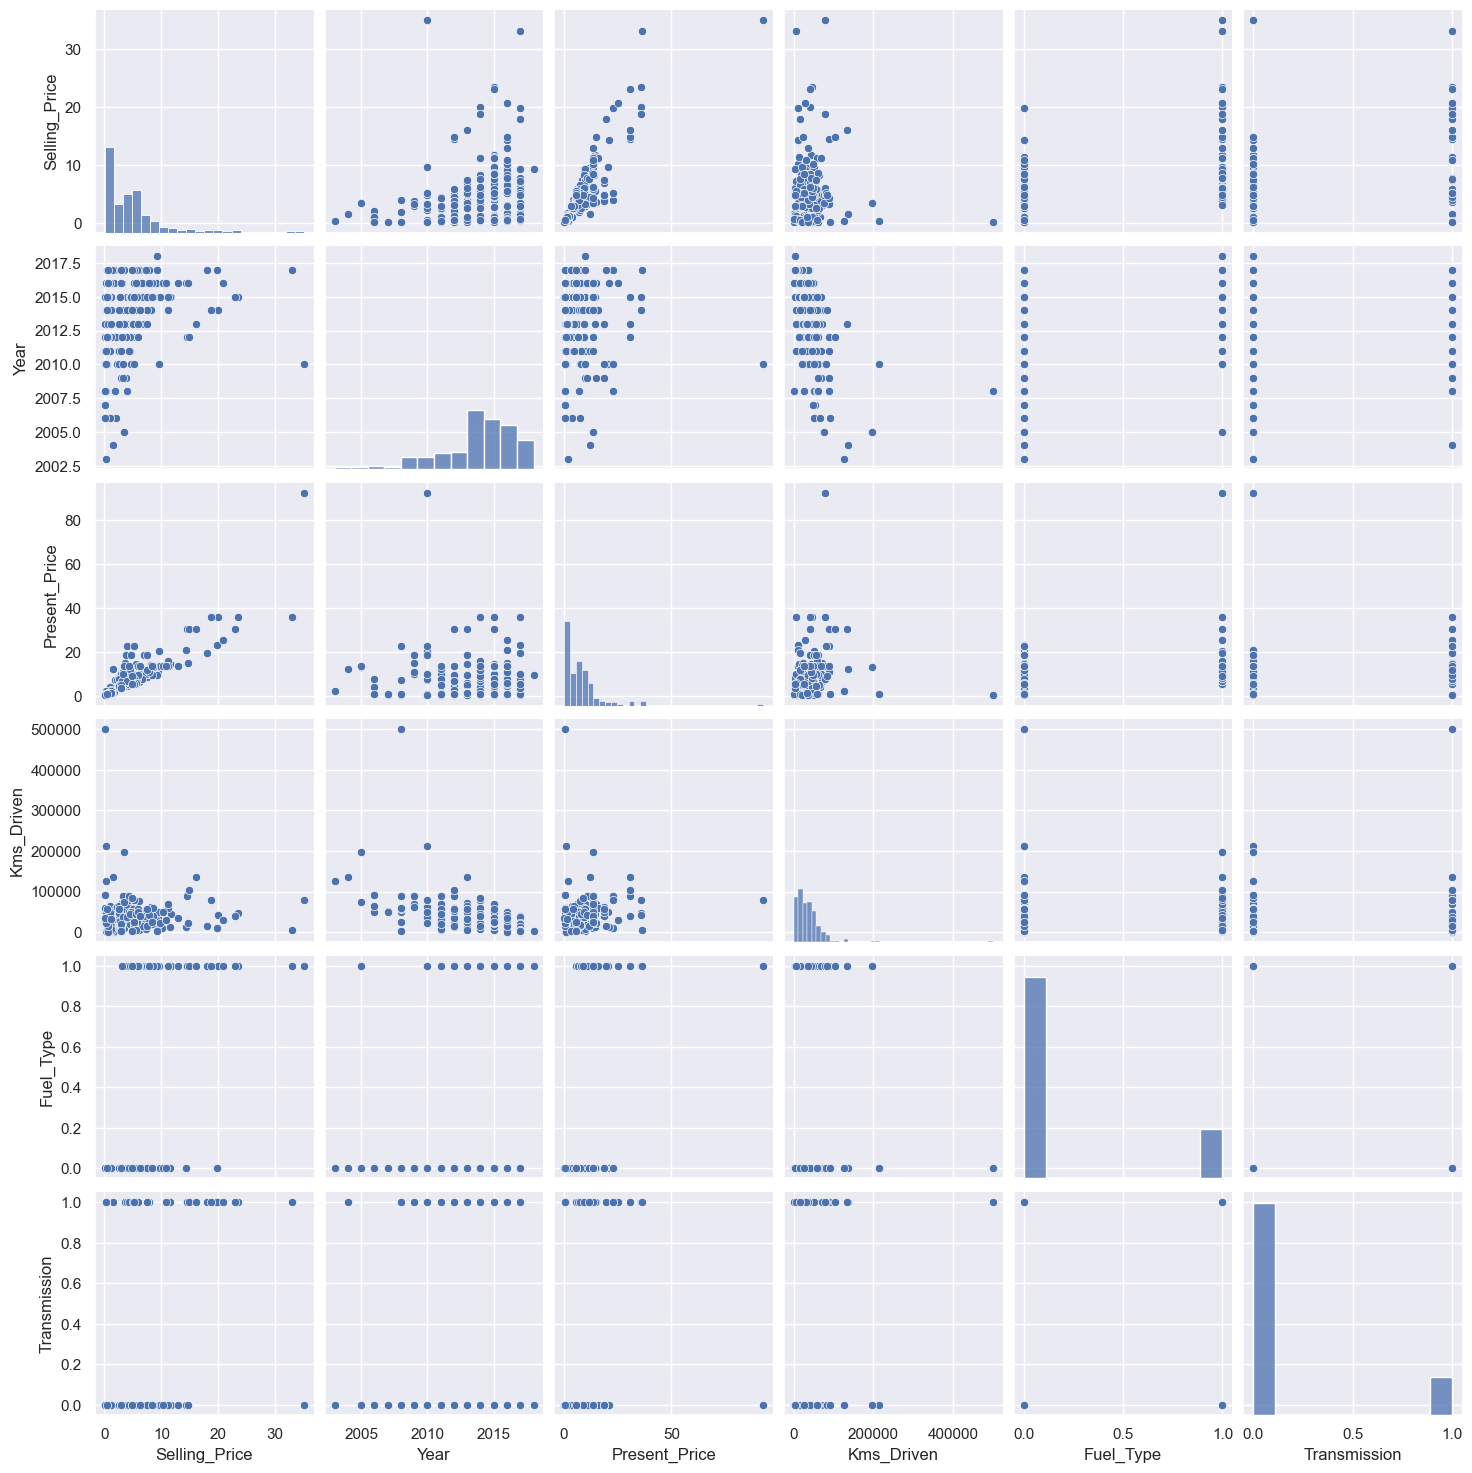

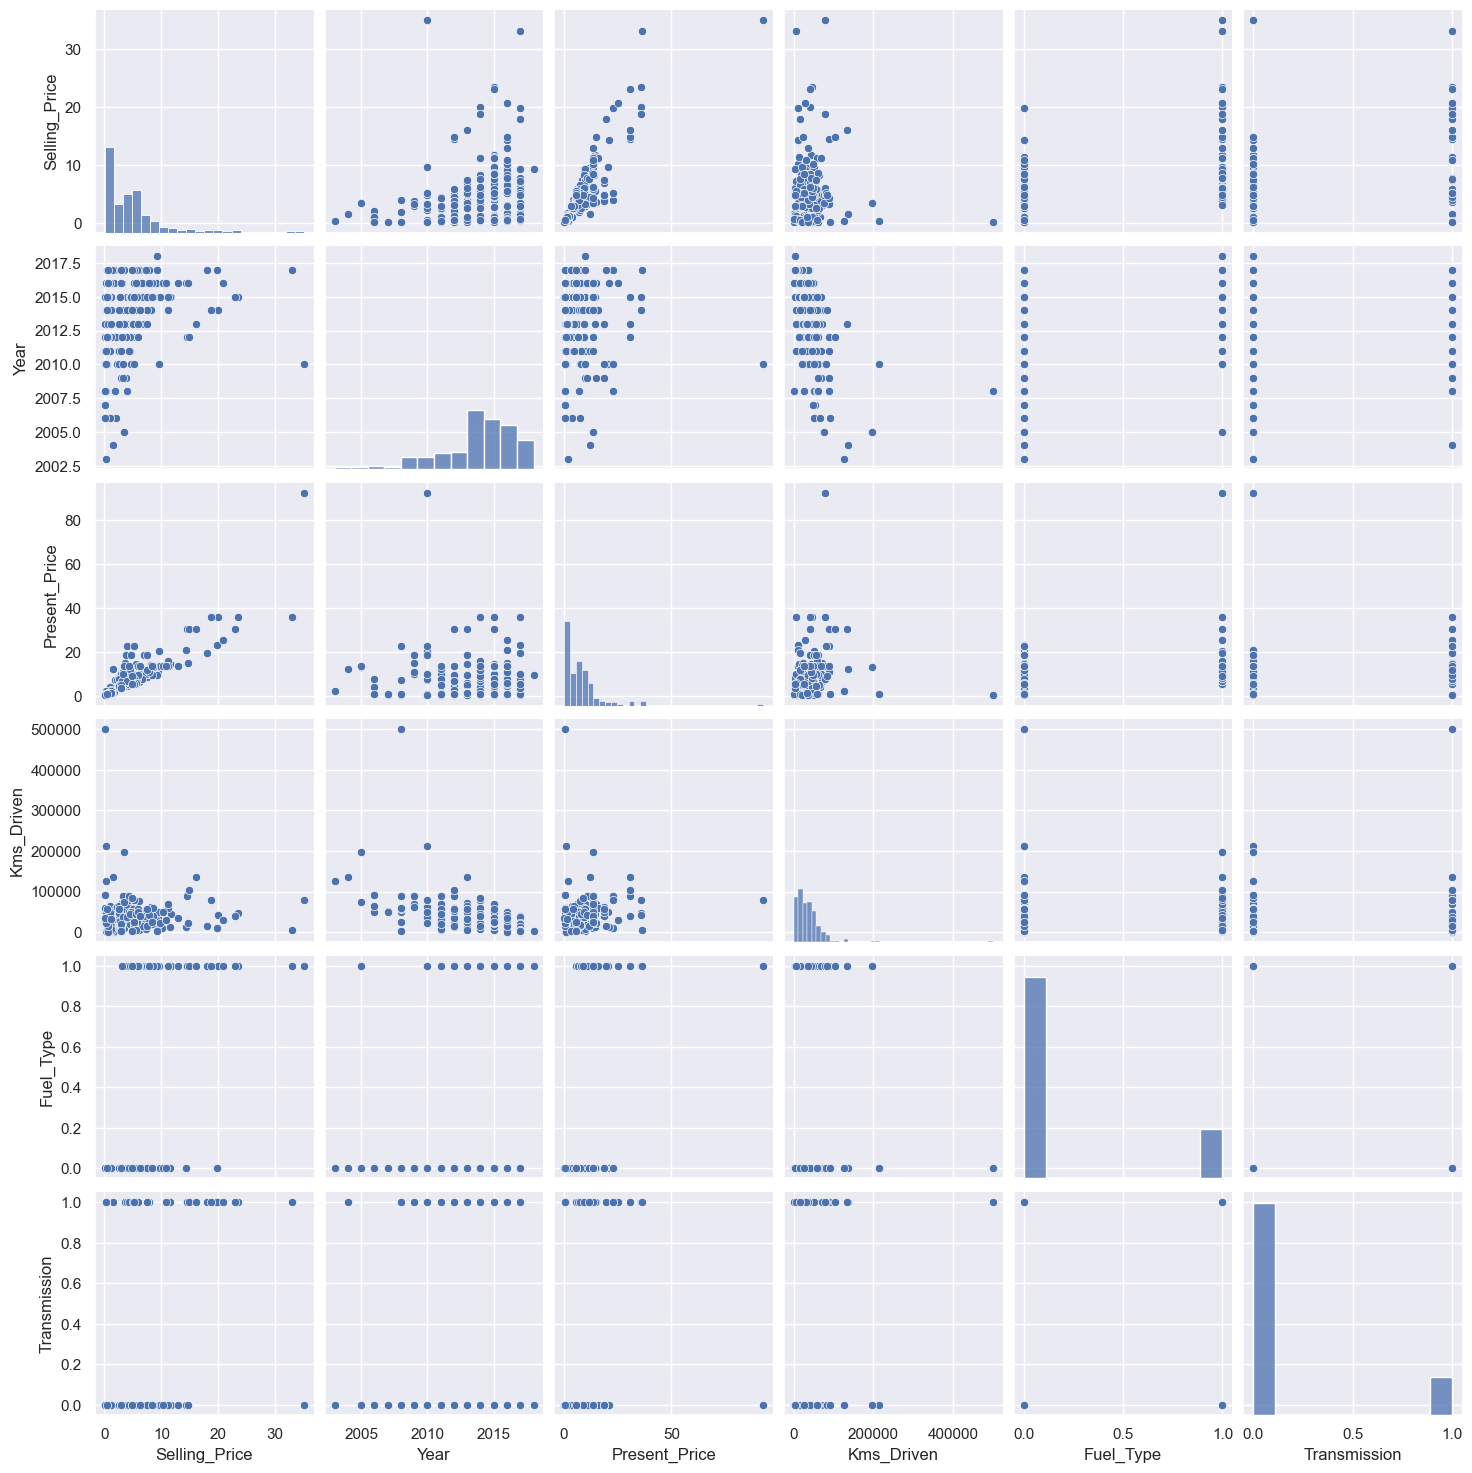

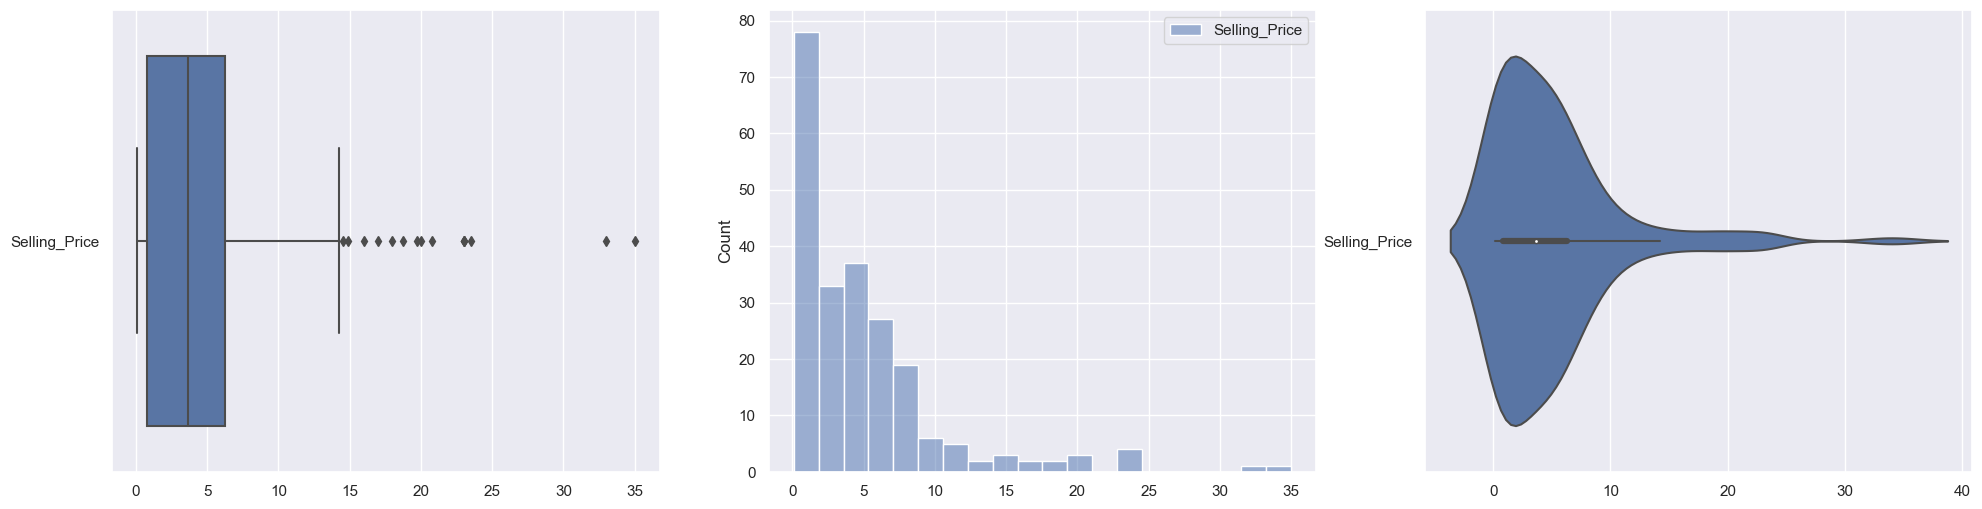

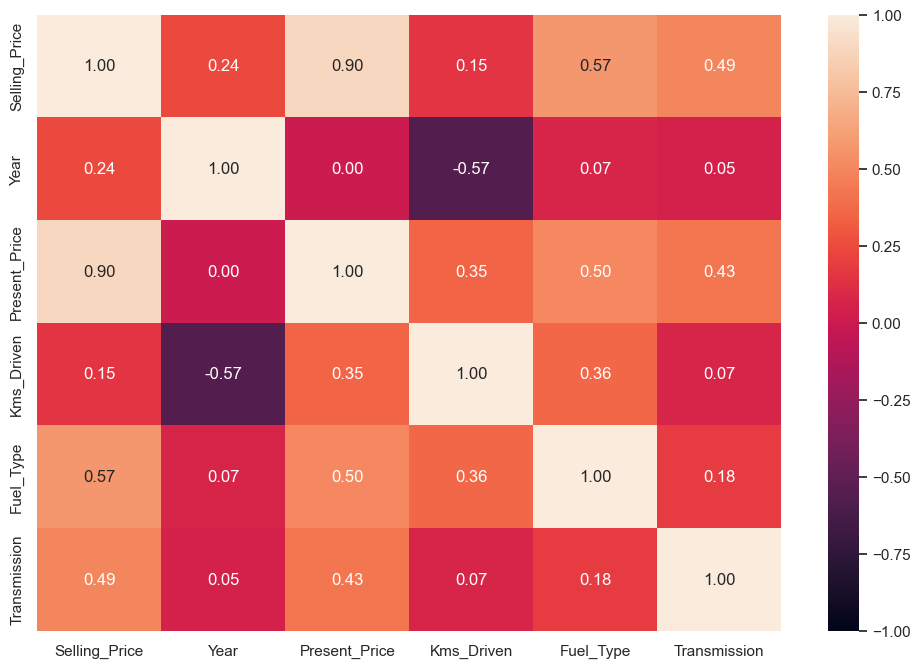

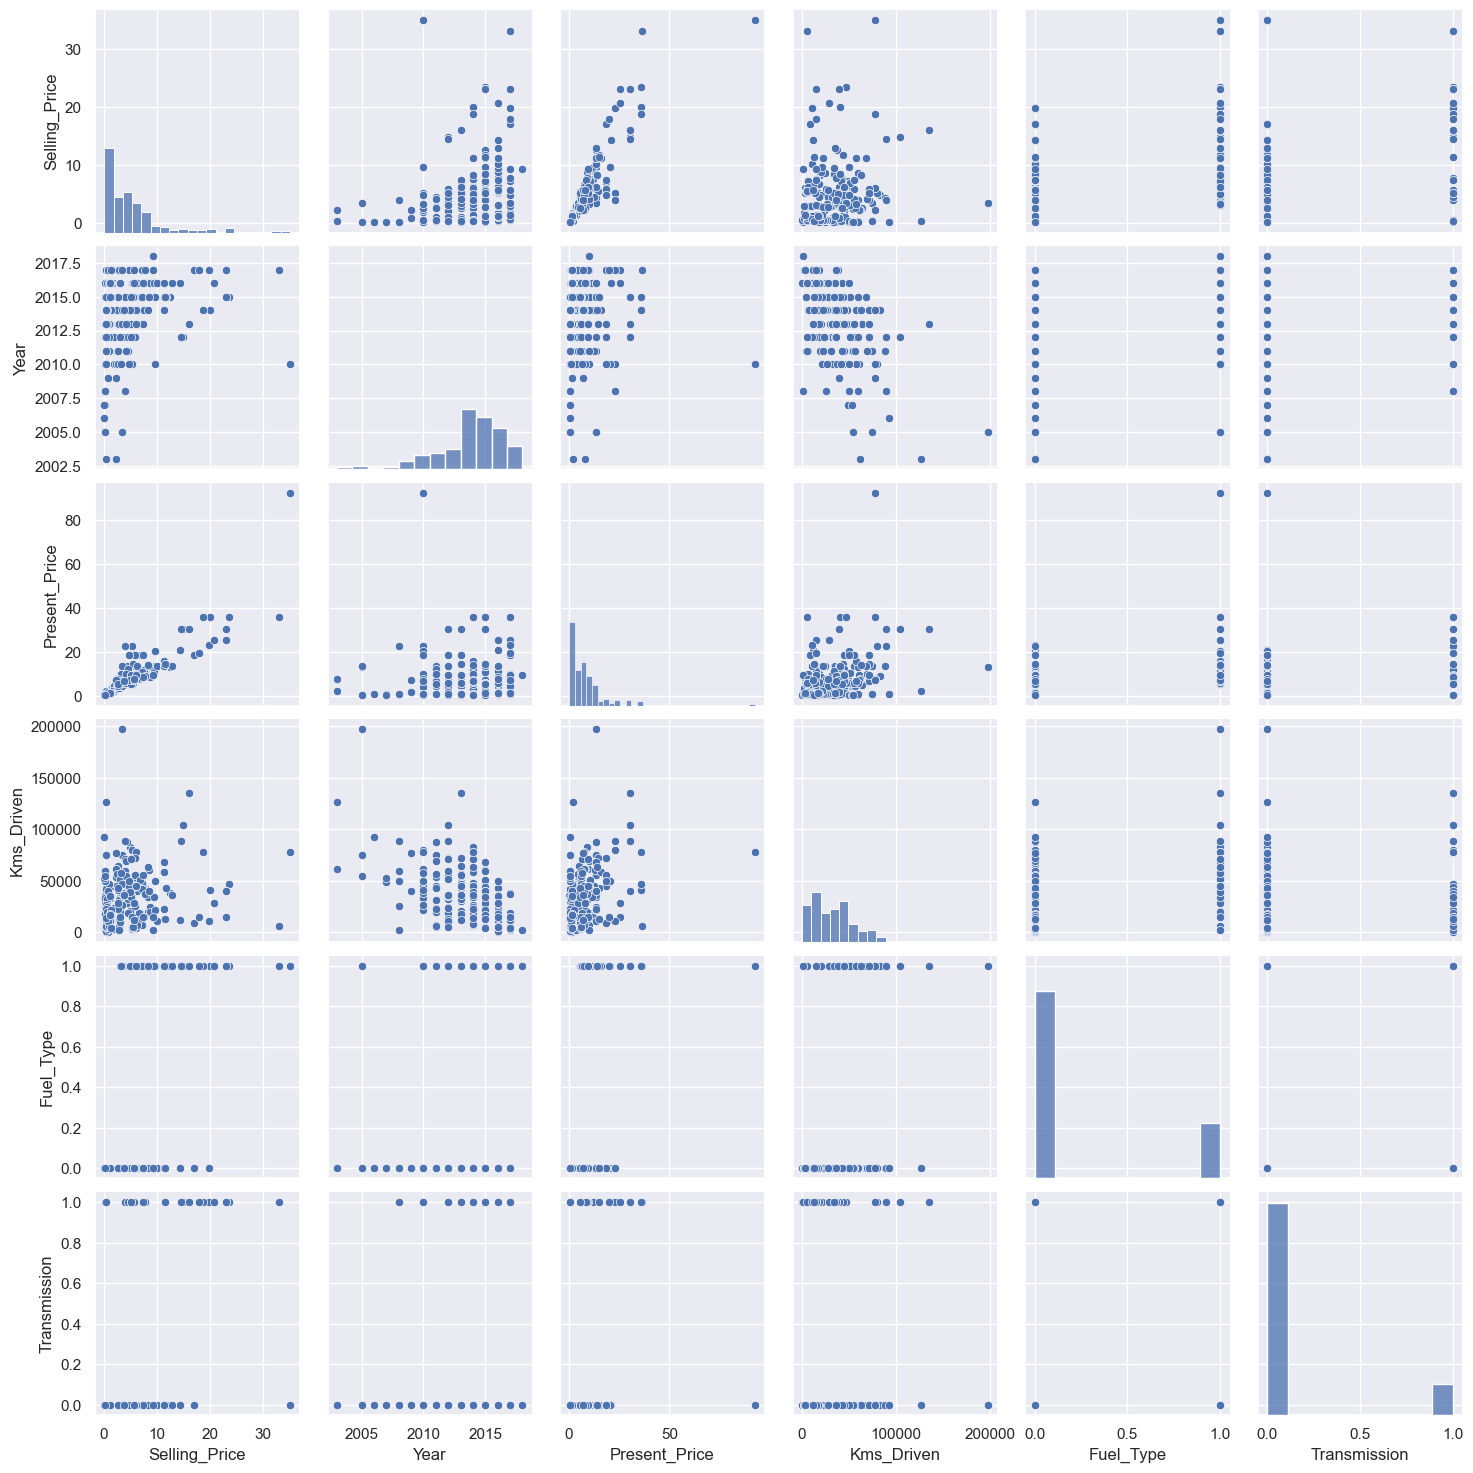

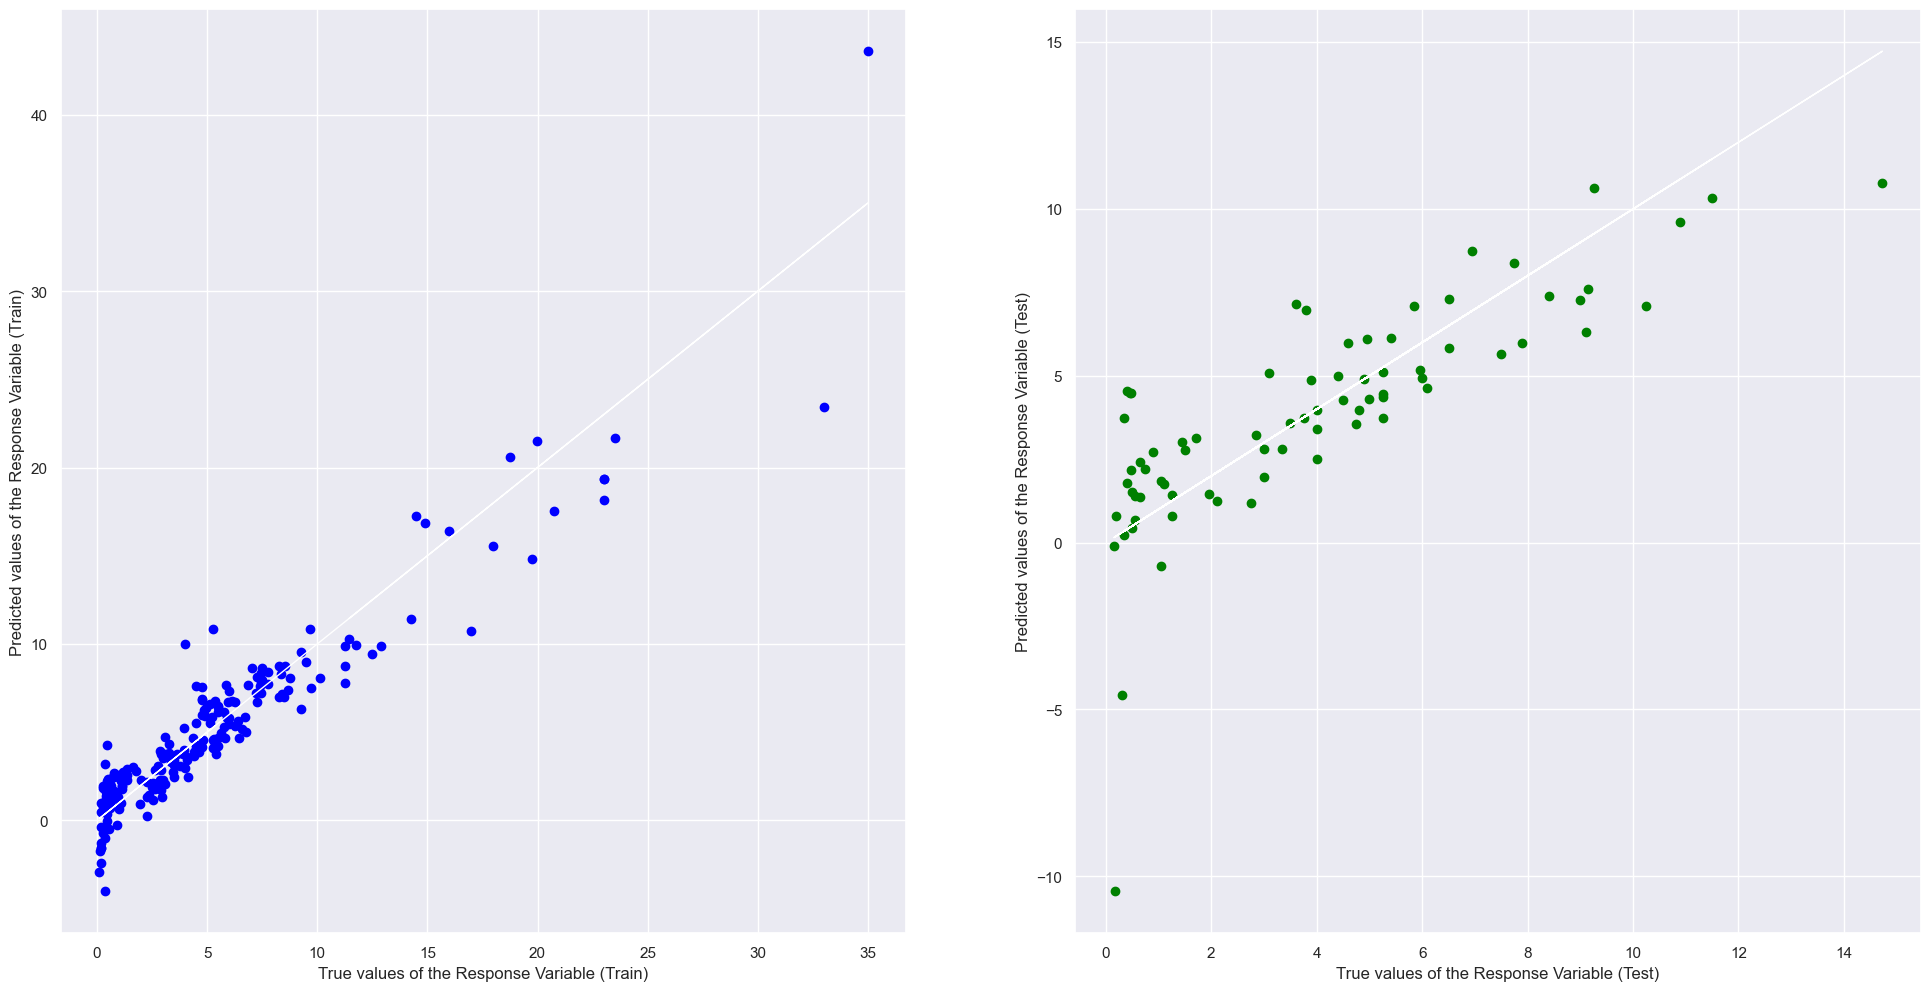

In [89]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8949185441673054
Mean Squared Error (MSE) 	: 3.2516630381106477

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5769873931382596
Mean Squared Error (MSE) 	: 4.428838996852848



Intercept of Regression 	: b =  [-804.26544244]
Coefficients of Regression 	: a =  [[ 3.99822818e-01  4.32234226e-01 -2.52078130e-06  1.97219858e+00
   1.47598183e+00]]

      Predictors  Coefficients
0           Year      0.399823
1  Present_Price      0.432234
2     Kms_Driven     -0.000003
3      Fuel_Type      1.972199
4   Transmission      1.475982



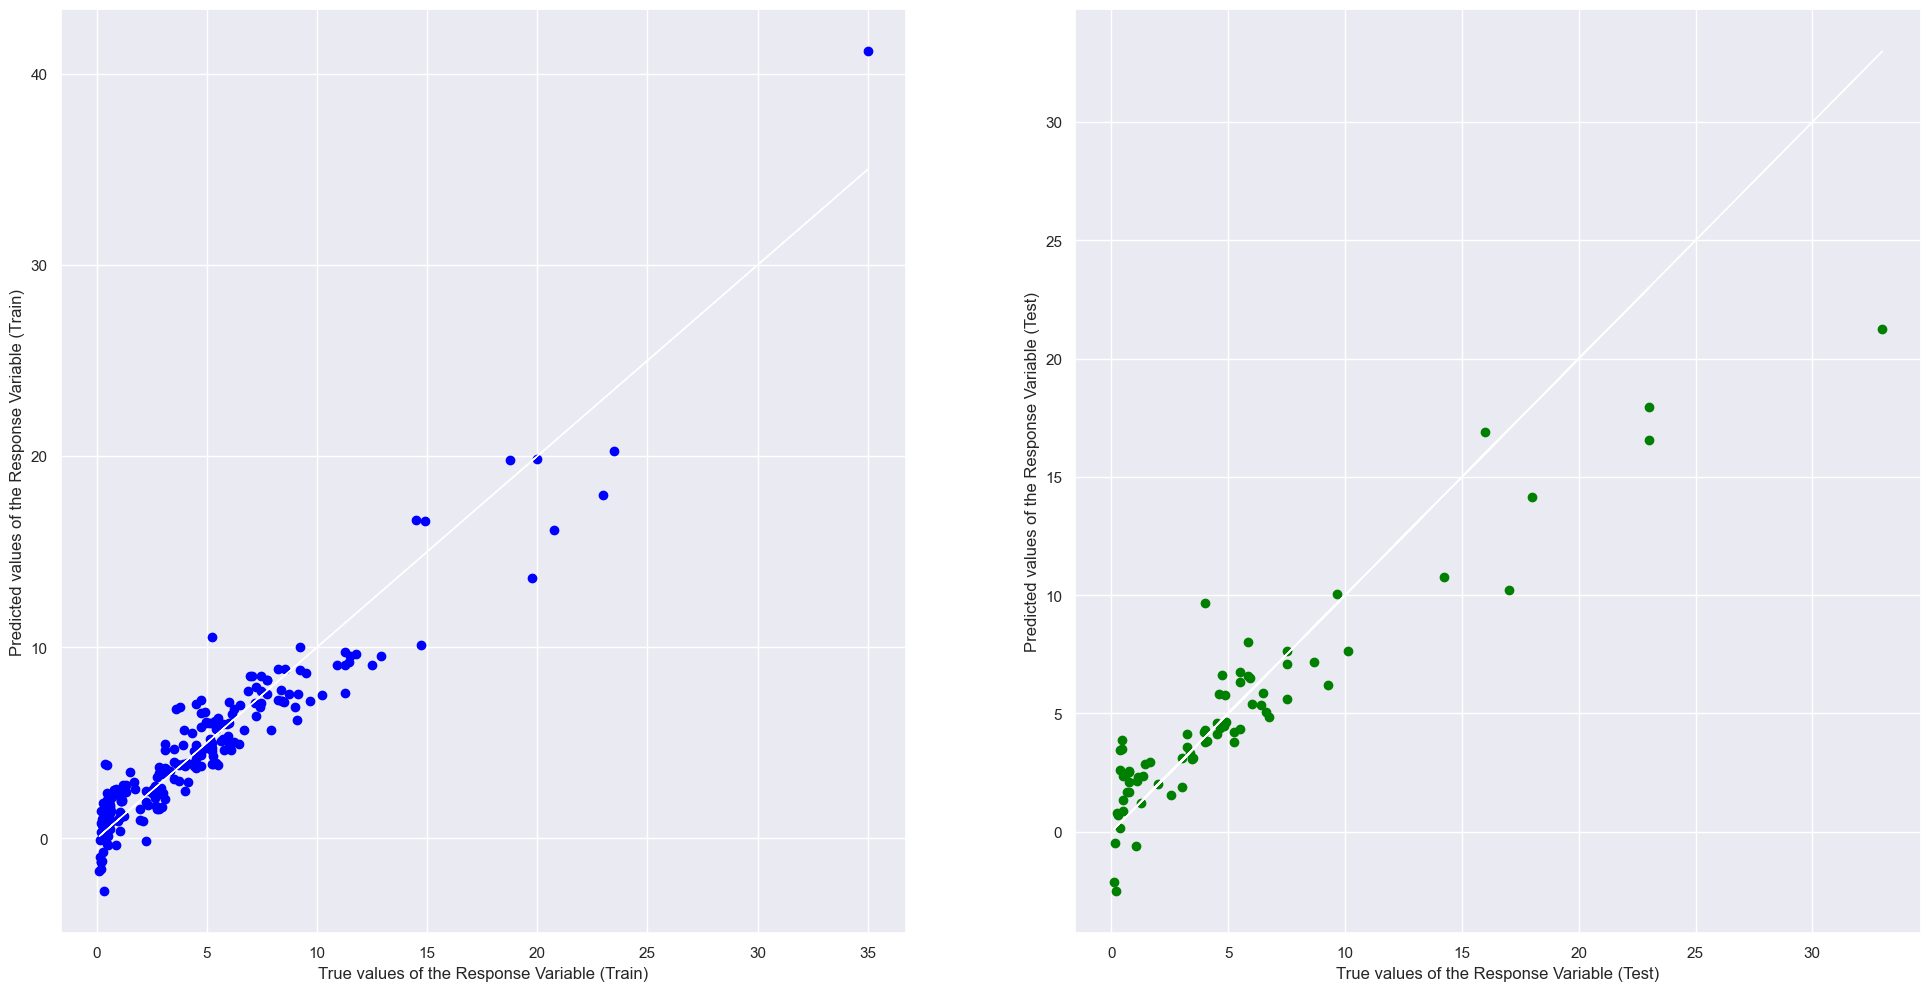

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8958115479584814
Mean Squared Error (MSE) 	: 2.395433916585113

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8308038422898509
Mean Squared Error (MSE) 	: 5.85253659261969



In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(cleancar["Selling_Price"])
X = pd.DataFrame(cleancar[["Year", "Present_Price", "Kms_Driven", "Fuel_Type", "Transmission"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()